In [ ]:
# Chapter 19: Linear Models

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
ls("package:datasets")

[1] "ability.cov"           "airmiles"              "AirPassengers"        
  [4] "airquality"            "anscombe"              "attenu"               
  [7] "attitude"              "austres"               "beaver1"              
 [10] "beaver2"               "BJsales"               "BJsales.lead"         
 [13] "BOD"                   "cars"                  "ChickWeight"          
 [16] "chickwts"              "co2"                   "CO2"                  
 [19] "crimtab"               "discoveries"           "DNase"                
 [22] "esoph"                 "euro"                  "euro.cross"           
 [25] "eurodist"              "EuStockMarkets"        "faithful"             
 [28] "fdeaths"               "Formaldehyde"          "freeny"               
 [31] "freeny.x"              "freeny.y"              "HairEyeColor"         
 [34] "Harman23.cor"          "Harman74.cor"          "Indometh"             
 [37] "infert"                "InsectSprays"          "iris"                 
 [40] "iris3"                 "islands"               "JohnsonJohnson"       
 [43] "LakeHuron"             "ldeaths"               "lh"                   
 [46] "LifeCycleSavings"      "Loblolly"              "longley"              
 [49] "lynx"                  "mdeaths"               "morley"               
 [52] "mtcars"                "nhtemp"                "Nile"                 
 [55] "nottem"                "npk"                   "occupationalStatus"   
 [58] "Orange"                "OrchardSprays"         "PlantGrowth"          
 [61] "precip"                "presidents"            "pressure"             
 [64] "Puromycin"             "quakes"                "randu"                
 [67] "rivers"                "rock"                  "Seatbelts"            
 [70] "sleep"                 "stack.loss"            "stack.x"              
 [73] "stackloss"             "state.abb"             "state.area"           
 [76] "state.center"          "state.division"        "state.name"           
 [79] "state.region"          "state.x77"             "sunspot.month"        
 [82] "sunspot.year"          "sunspots"              "swiss"                
 [85] "Theoph"                "Titanic"               "ToothGrowth"          
 [88] "treering"              "trees"                 "UCBAdmissions"        
 [91] "UKDriverDeaths"        "UKgas"                 "USAccDeaths"          
 [94] "USArrests"             "UScitiesD"             "USJudgeRatings"       
 [97] "USPersonalExpenditure" "uspop"                 "VADeaths"             
[100] "volcano"               "warpbreaks"            "women"                
[103] "WorldPhones"           "WWWusage"

# Using `data(father.son, package='UsingR')`

In [6]:
data(father.son, package='UsingR')

In [8]:
father.son %>% str

'data.frame':	1078 obs. of  2 variables:
 $ fheight: num  65 63.3 65 65.8 61.1 ...
 $ sheight: num  59.8 63.2 63.3 62.8 64.3 ...


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


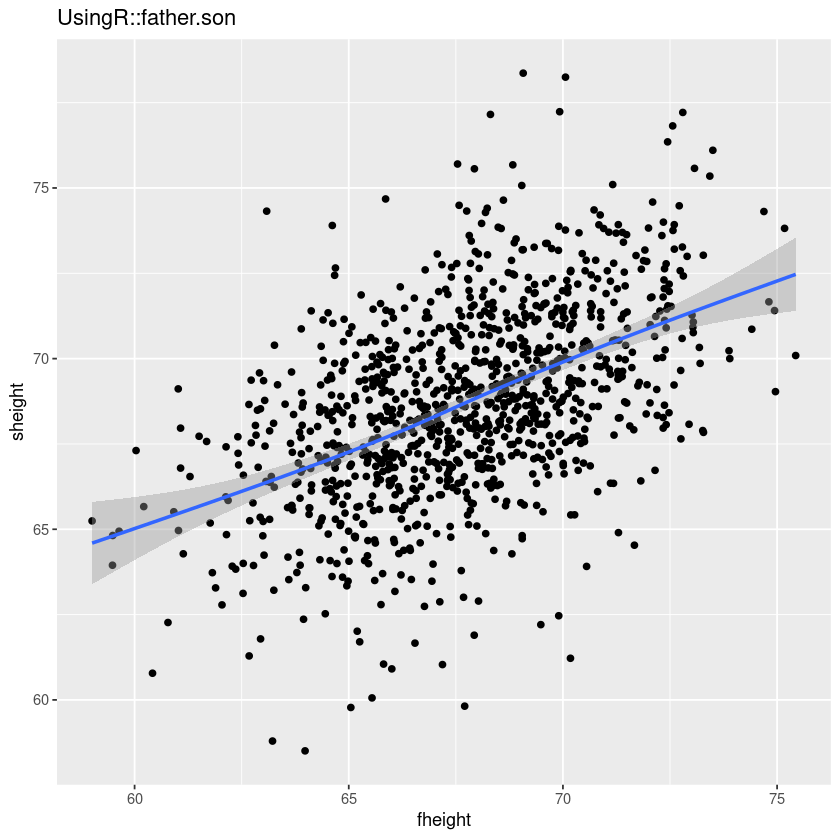

In [11]:
(
    father.son 
    %>% ggplot(aes(fheight,sheight)) 
    + geom_point() 
    + geom_smooth()
    + labs(
        title='UsingR::father.son',x='fheight',y='sheight'
    )
)

In [13]:
lm(fheight~sheight,father.son) -> m
m


Call:
lm(formula = fheight ~ sheight, data = father.son)

Coefficients:
(Intercept)      sheight  
    34.1075       0.4889  


In [14]:
m %>% summary


Call:
lm(formula = fheight ~ sheight, data = father.son)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3590 -1.6406  0.0761  1.6095  7.1044 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.10745    1.76826   19.29   <2e-16 ***
sheight      0.48890    0.02572   19.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.376 on 1076 degrees of freedom
Multiple R-squared:  0.2513,	Adjusted R-squared:  0.2506 
F-statistic: 361.2 on 1 and 1076 DF,  p-value: < 2.2e-16


# Using `data(tips, package="reshape2")`

In [15]:
data(tips, package="reshape2")

In [16]:
tips %>% str

'data.frame':	244 obs. of  7 variables:
 $ total_bill: num  17 10.3 21 23.7 24.6 ...
 $ tip       : num  1.01 1.66 3.5 3.31 3.61 4.71 2 3.12 1.96 3.23 ...
 $ sex       : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 2 2 2 2 2 ...
 $ smoker    : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ day       : Factor w/ 4 levels "Fri","Sat","Sun",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ time      : Factor w/ 2 levels "Dinner","Lunch": 1 1 1 1 1 1 1 1 1 1 ...
 $ size      : int  2 3 3 2 4 4 2 4 2 2 ...


In [17]:
tips %>% head

,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4


In [39]:
(aov(tip ~ day -1, tips) -> tips_model_aov) %>% summary

           Df Sum Sq Mean Sq F value Pr(>F)    
day         4 2203.0   550.8   290.1 <2e-16 ***
Residuals 240  455.7     1.9                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [37]:
(lm(tip ~ day -1, tips) -> tips_model_lm) %>% summary


Call:
lm(formula = tip ~ day - 1, data = tips)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2451 -0.9931 -0.2347  0.5382  7.0069 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
dayFri    2.7347     0.3161   8.651 7.46e-16 ***
daySat    2.9931     0.1477  20.261  < 2e-16 ***
daySun    3.2551     0.1581  20.594  < 2e-16 ***
dayThur   2.7715     0.1750  15.837  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.378 on 240 degrees of freedom
Multiple R-squared:  0.8286,	Adjusted R-squared:  0.8257 
F-statistic: 290.1 on 4 and 240 DF,  p-value: < 2.2e-16


In [28]:
tips  %>% str

'data.frame':	244 obs. of  7 variables:
 $ total_bill: num  17 10.3 21 23.7 24.6 ...
 $ tip       : num  1.01 1.66 3.5 3.31 3.61 4.71 2 3.12 1.96 3.23 ...
 $ sex       : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 2 2 2 2 2 ...
 $ smoker    : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ day       : Factor w/ 4 levels "Fri","Sat","Sun",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ time      : Factor w/ 2 levels "Dinner","Lunch": 1 1 1 1 1 1 1 1 1 1 ...
 $ size      : int  2 3 3 2 4 4 2 4 2 2 ...


In [51]:
(
    tips %>% 
    group_by(day) %>% 
    summarize(
        t.mean = mean(tip),
        t.cnt  = NROW(tip)-1,
        t.std  = sd(tip),        
        t.frac = qt(p=0.9, df = t.cnt -1 ),
        se_lower = t.mean - t.frac*t.std/(t.cnt),
        se_upper = t.mean + t.frac*t.std/(t.cnt),
    )
)

day,t.mean,t.cnt,t.std,t.frac,se_lower,se_upper
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Fri,2.734737,18,1.019577,1.333379,2.659210,2.810264
Sat,2.993103,86,1.631014,1.291591,2.968608,3.017599
Sun,3.255132,75,1.234880,1.293097,3.233841,3.276423
Thur,2.771452,61,1.240223,1.295821,2.745106,2.797798


In [49]:
#tips_model_lm %>% summary 
tips_model_lm %>% confint

,2.5 %,97.5 %
dayFri,2.112015,3.357459
daySat,2.702091,3.284116
daySun,2.943770,3.566493
dayThur,2.426725,3.116179


In [52]:
housing <- read.table(
    "http://www.jaredlander.com/data/housing.csv",
    sep = ",", header = TRUE,
    stringsAsFactors = FALSE
)

In [53]:
housing %>% str

'data.frame':	2626 obs. of  13 variables:
 $ Neighborhood           : chr  "FINANCIAL" "FINANCIAL" "FINANCIAL" "FINANCIAL" ...
 $ Building.Classification: chr  "R9-CONDOMINIUM" "R4-CONDOMINIUM" "RR-CONDOMINIUM" "R4-CONDOMINIUM" ...
 $ Total.Units            : int  42 78 500 282 239 133 109 107 247 121 ...
 $ Year.Built             : int  1920 1985 NA 1930 1985 1986 1985 1986 1987 1985 ...
 $ Gross.SqFt             : int  36500 126420 554174 249076 219495 139719 105000 87479 255845 106129 ...
 $ Estimated.Gross.Income : int  1332615 6633257 17310000 11776313 10004582 5127687 4365900 3637377 11246946 4115683 ...
 $ Gross.Income.per.SqFt  : num  36.5 52.5 31.2 47.3 45.6 ...
 $ Estimated.Expense      : int  342005 1762295 3543000 2784670 2783197 1497788 1273650 1061120 2440761 1231096 ...
 $ Expense.per.SqFt       : num  9.37 13.94 6.39 11.18 12.68 ...
 $ Net.Operating.Income   : int  990610 4870962 13767000 8991643 7221385 3629899 3092250 2576257 8806185 2884587 ...
 $ Full.Market.Value  

In [55]:
housing %>% head


,Neighborhood,Building.Classification,Total.Units,Year.Built,Gross.SqFt,Estimated.Gross.Income,Gross.Income.per.SqFt,Estimated.Expense,Expense.per.SqFt,Net.Operating.Income,Full.Market.Value,Market.Value.per.SqFt,Boro
,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>
1,FINANCIAL,R9-CONDOMINIUM,42,1920,36500,1332615,36.51,342005,9.37,990610,7300000,200.00,Manhattan
2,FINANCIAL,R4-CONDOMINIUM,78,1985,126420,6633257,52.47,1762295,13.94,4870962,30690000,242.76,Manhattan
3,FINANCIAL,RR-CONDOMINIUM,500,NA,554174,17310000,31.24,3543000,6.39,13767000,90970000,164.15,Manhattan
4,FINANCIAL,R4-CONDOMINIUM,282,1930,249076,11776313,47.28,2784670,11.18,8991643,67556006,271.23,Manhattan
5,TRIBECA,R4-CONDOMINIUM,239,1985,219495,10004582,45.58,2783197,12.68,7221385,54320996,247.48,Manhattan
6,TRIBECA,R4-CONDOMINIUM,133,1986,139719,5127687,36.70,1497788,10.72,3629899,26737996,191.37,Manhattan


In [54]:
housing %>% names

[1] "Neighborhood"            "Building.Classification"
 [3] "Total.Units"             "Year.Built"             
 [5] "Gross.SqFt"              "Estimated.Gross.Income" 
 [7] "Gross.Income.per.SqFt"   "Estimated.Expense"      
 [9] "Expense.per.SqFt"        "Net.Operating.Income"   
[11] "Full.Market.Value"       "Market.Value.per.SqFt"  
[13] "Boro"

In [74]:
names(housing) <- c(
    "Neighborhood", "Class", "Units", "YearBuilt",
    "SqFt", "Income", "IncomePerSqFt", "Expense",
    "ExpensePerSqFt", "NetIncome", "Value",
    "ValuePerSqFt", "Boro")

In [75]:
library(patchwork)

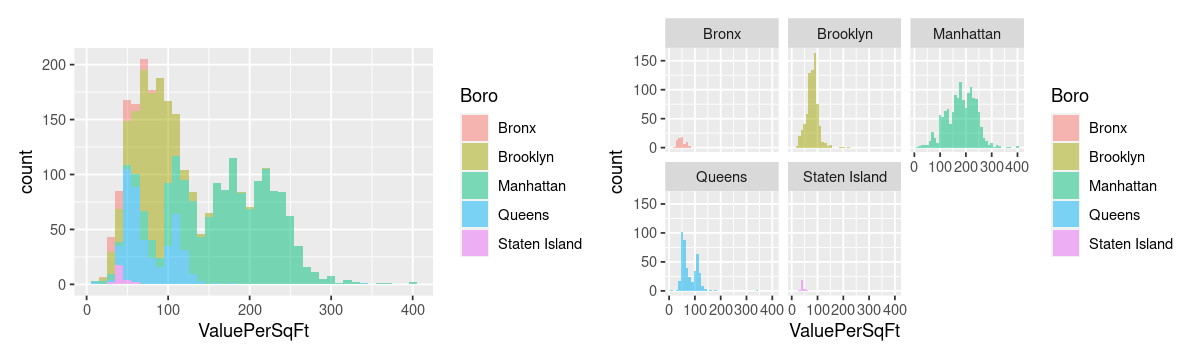

In [76]:
options(repr.plot.width=10, repr.plot.height=3)

(
ggplot(housing,aes(ValuePerSqFt)) 
#+ geom_freqpoly(binwidth=10)
+ geom_histogram(aes(fill=Boro),binwidth=10,alpha=0.5)    

) -> p1

p1+ facet_wrap(~Boro) -> p2

p1+p2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


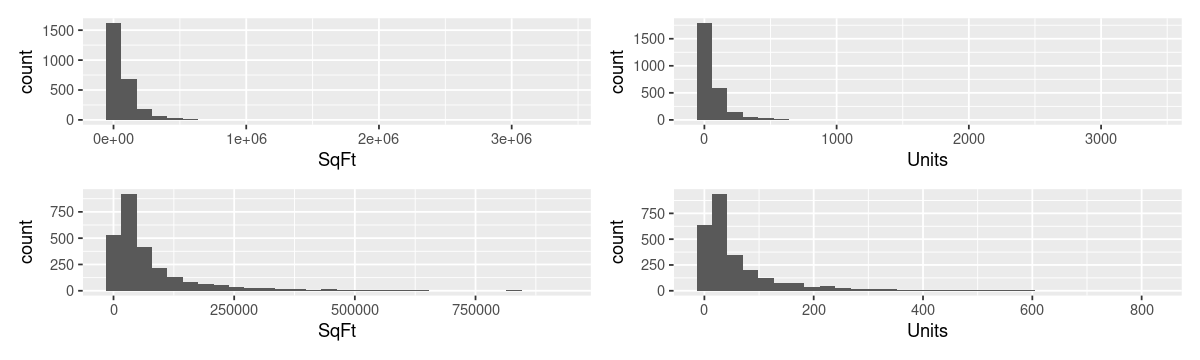

In [78]:
ggplot(housing, aes(x=SqFt)) + geom_histogram() -> p1
ggplot(housing, aes(x=Units)) + geom_histogram() -> p2
ggplot(housing[housing$Units < 1000, ], aes(x=SqFt)) + geom_histogram() -> p3
ggplot(housing[housing$Units < 1000, ], aes(x=Units)) +geom_histogram()-> p4
p1 + p2 + p3 + p4